In [1]:
import pandas as pd
import math
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import matplotlib
import seaborn as sns
#Red
red1= sns.color_palette("Reds_d",1)
red2= sns.color_palette("Reds_d",2)
red3= sns.color_palette("Reds_d",3)
red4= sns.color_palette("Reds_d",4)
red5= sns.color_palette("Reds_d",5)
red6= sns.color_palette("Reds_d",6)
red7= sns.color_palette("Reds_d",7)
red8= sns.color_palette("Reds_d",8)

#YellowGreen
yg1= sns.color_palette("YlGn_d",1)
yg2= sns.color_palette("YlGn_d",2)
yg3= sns.color_palette("YlGn_d",3)
yg4= sns.color_palette("YlGn_d",4)
yg5= sns.color_palette("YlGn_d",5)
yg7= sns.color_palette("YlGn_d",7)

#GreenBlue
gb1= sns.color_palette("GnBu_d",1)
gb2= sns.color_palette("GnBu_d",2)
gb3= sns.color_palette("GnBu_d",3)
gb4= sns.color_palette("GnBu_d",4)
gb5= sns.color_palette("GnBu_d",5)
gb6= sns.color_palette("GnBu_d",6)
gb7= sns.color_palette("GnBu_d",7)
gb8= sns.color_palette("GnBu_d",8)

cp2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],gb7[4]]))
cp2v1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],yg7[0]]))
cp3 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],gb7[4],red7[2]]))
cp4 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[6],gb7[4],red7[2],yg7[0]]))
cp2_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],gb7[4],gb7[6]]))
cp_total_spectrum = list(map(lambda x: sns.desaturate(x,0.9),gb7 + yg7 + red7))

In [2]:
sns.set_palette(cp4)
sns.color_palette()

[(0.20872433679354097, 0.2971118800461361, 0.23389619377162635),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131),
 (0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.6120315263360248, 0.8081330257593234, 0.5357962322183777)]

In [3]:
sns.set_palette(cp2v1)
sns.color_palette()

[(0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.6120315263360248, 0.8081330257593234, 0.5357962322183777)]

In [4]:
sns.set_palette(cp3)
sns.color_palette()

[(0.6120315263360248, 0.8081330257593234, 0.5357962322183777),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131),
 (0.8807358708189157, 0.32277047289504046, 0.2744659746251443)]

In [5]:
def CoCoPeLia_log_read(filename):
    temp = pd.read_csv(filename, header=None, names = ['T','dev_num', 'dev_id_token', 'cachesize_limit','TransA','TransB',
                                                    'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc', 'timer'], 
                                                     dtype = {'M': np.int64, 'N': np.int64, 'K': np.int64, 'timer': np.float64} )
    temp.sort_values(by=['M','N','K'])
    return temp

machine = 'silver1'
version="0.1"
Mmax = math.sqrt(32*1e9/(3*8))/256 #Tesla-V100
MemMax = 32*(1024**3)
Rmax_Gflops = 7*2*1024
#Mmax = math.sqrt(11*1e9/(3*8))/256 #Tesla-K40
#machine = 'testbed-II_Tesla-V100'
CoCopeLia_data = CoCoPeLia_log_read('../../%s_build/%s-install/Benchmarking/testLogs/CoCoPeLiaDgemmRunner_%s.log' %(machine, machine, version))
cuBLASXt_data = CoCoPeLia_log_read('../../%s_build/%s-install/Benchmarking/testLogs/cuBLASXtDgemmRunner_%s.log' %(machine, machine, version))
BLASX_data = CoCoPeLia_log_read('../../%s_build/%s-install/Benchmarking/testLogs/BLASxDgemmRunner_%s.log' %(machine, machine, version))
BLASXEX_data = CoCoPeLia_log_read('../../%s_build/%s-install/Benchmarking/testLogs/BLASxExDgemmRunner_%s.log' %(machine, machine, version))
XKBLAS_data = CoCoPeLia_log_read('../../%s_build/%s-install/Benchmarking/testLogs/XKBLASDgemmRunner_%s.log' %(machine, machine, version))
print('CoCoPeLia Data len: %d' % len(CoCopeLia_data))
print('cuBLASXt Data len: %d' % len(cuBLASXt_data))
print('BLASX Data len: %d' % len(BLASX_data))
print('BLASXEX Data len: %d' % len(BLASXEX_data))
print('XKBLAS Data len: %d' % len(XKBLAS_data))

CoCoPeLia Data len: 760
cuBLASXt Data len: 730
BLASX Data len: 749
BLASXEX Data len: 749
XKBLAS Data len: 749


In [6]:
def CoCoPeLia_grouby_avg(df):
    return df.groupby(['T','dev_num', 'dev_id_token', 'cpu_ratio','TransA','TransB',
        'alpha','beta','M','N','K','Asloc','Bsloc','Csloc', 'CsOutloc'], as_index=False, sort=False).mean()
#CoCoPeLia_group = CoCoPeLia_grouby_list_avg(CoCopeLia_data)
#print(CoCoPeLia_plot_data)


In [7]:
font=8
plt.rc('font', family='serif', serif='Times')
#plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)
plt.rc('axes', labelsize=font)

# width as measured in inkscape
width = 3.487
height = width / 1.618

#fig, ax = plt.subplots()
#fig.subplots_adjust(left=.15, bottom=.17, right=.99, top=.97)

In [11]:
# Plot all, in respect to Problem size
fig, ax = plt.subplots()
fig.subplots_adjust(left=.16, bottom=.16, right=.99, top=.86)
CoCopeLia_data_plot = CoCoPeLia_grouby_avg(CoCopeLia_data)
plt.plot(8*(CoCopeLia_data_plot['M']*(CoCopeLia_data_plot['N']+CoCopeLia_data_plot['K']) + CoCopeLia_data_plot['N']*CoCopeLia_data_plot['K']) , 
         CoCopeLia_data_plot['M']*CoCopeLia_data_plot['N']*(2*CoCopeLia_data_plot['K'] + 2)/(1e9*CoCopeLia_data_plot['timer']),  color=cp4[0], label='CoCopeLia')
cuBLASXt_data_plot = CoCoPeLia_grouby_avg(cuBLASXt_data)
plt.plot(8*(cuBLASXt_data_plot['M']*(cuBLASXt_data_plot['N']+cuBLASXt_data_plot['K']) + cuBLASXt_data_plot['N']*cuBLASXt_data_plot['K']) , 
         cuBLASXt_data_plot['M']*cuBLASXt_data_plot['N']*(2*cuBLASXt_data_plot['K'] + 2)/(1e9*cuBLASXt_data_plot['timer']), color=cp4[1], label='cuBLASXt')
BLASX_data_plot = CoCoPeLia_grouby_avg(BLASX_data)
plt.plot(8*(BLASX_data_plot['M']*(BLASX_data_plot['N']+BLASX_data_plot['K']) + BLASX_data_plot['N']*BLASX_data_plot['K']) , 
         BLASX_data_plot['M']*BLASX_data_plot['N']*(2*BLASX_data_plot['K'] + 2)/(1e9*BLASX_data_plot['timer']),  color=cp4[2], label='BLASx')
BLASXEX_data_plot = CoCoPeLia_grouby_avg(BLASXEX_data)
plt.plot(8*(BLASXEX_data_plot['M']*(BLASXEX_data_plot['N']+BLASXEX_data_plot['K']) + BLASXEX_data_plot['N']*BLASXEX_data_plot['K']) , 
         BLASXEX_data_plot['M']*BLASXEX_data_plot['N']*(2*BLASXEX_data_plot['K'] + 2)/(1e9*BLASXEX_data_plot['timer']), color=cp4[3], label='BLASxEx')
XKBLAS_data_plot = CoCoPeLia_grouby_avg(XKBLAS_data)
plt.plot(8*(XKBLAS_data_plot['M']*(XKBLAS_data_plot['N']+XKBLAS_data_plot['K']) + XKBLAS_data_plot['N']*XKBLAS_data_plot['K']) , 
         XKBLAS_data_plot['M']*XKBLAS_data_plot['N']*(2*XKBLAS_data_plot['K'] + 2)/(1e9*XKBLAS_data_plot['timer']), color='m', label='XKBLAS')
plt.grid(axis='y')
plt.ylabel('Performance (Gflops/s)')
plt.xlabel('Problem Size')

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
plt.axhline(Rmax_Gflops, linewidth = 0.5, color='b', linestyle = '--')
plt.text(xmax - (xmax-xmin)*0.05, Rmax_Gflops*0.95, 'Peak' , fontsize = font -2, color='b')
plt.axvline(MemMax,color='c',linewidth = 0.5, linestyle = '--')
plt.text(MemMax*1.01, ymin + (ymax-ymin)*0.05, 'Single GPU Mem', fontsize = font -2, color='c')

#plt.yscale('log')
#fig.set_size_inches(width, height)
fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
    fontsize=font, fancybox = False, ncol=4)
#fig.savefig('Plot-Transpose-Comparisson-%s.pdf' % machine)
fig.savefig('Plots/Plot_full_gflops_comp-all_%s.png' % (machine))
fig.savefig('Plots/Plot_full_gflops_comp-all_%s.pdf' % (machine))
plt.close()

KeyError: 'min_t'

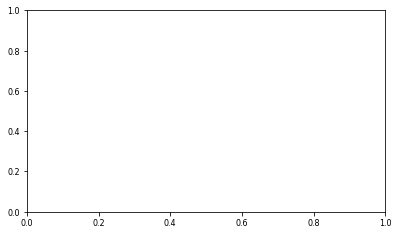

In [9]:
# Plot all, in respect to H2D Transfers

def requires_h2d(elem):
    if elem == -1:
        return 1
    else:
        return 0
fig, ax = plt.subplots()
fig.subplots_adjust(left=.16, bottom=.16, right=.99, top=.86)
CoCopeLia_data_plot = CoCopeLia_data
plt.plot(8*(CoCopeLia_data_plot['M']*(CoCopeLia_data_plot['N']*CoCopeLia_data_plot['Csloc'].apply(lambda x: requires_h2d(x))+CoCopeLia_data_plot['K']*CoCopeLia_data_plot['Asloc'].apply(lambda x: requires_h2d(x))) 
            + CoCopeLia_data_plot['N']*CoCopeLia_data_plot['K']*CoCopeLia_data_plot['Bsloc'].apply(lambda x: requires_h2d(x))) , 
         CoCopeLia_data_plot['M']*CoCopeLia_data_plot['N']*(2*CoCopeLia_data_plot['K'] + 2)/(1e9*CoCopeLia_data_plot['min_t']), 'o', markersize= 1,  color=cp4[0], label='CoCopeLia')
cuBLASXt_data_plot = cuBLASXt_data
plt.plot(8*(cuBLASXt_data_plot['M']*(cuBLASXt_data_plot['N']*cuBLASXt_data_plot['Csloc'].apply(lambda x: requires_h2d(x))+cuBLASXt_data_plot['K']*cuBLASXt_data_plot['Asloc'].apply(lambda x: requires_h2d(x))) 
            + cuBLASXt_data_plot['N']*cuBLASXt_data_plot['K']*cuBLASXt_data_plot['Bsloc'].apply(lambda x: requires_h2d(x))), 
         cuBLASXt_data_plot['M']*cuBLASXt_data_plot['N']*(2*cuBLASXt_data_plot['K'] + 2)/(1e9*cuBLASXt_data_plot['min_t']), 'x', markersize= 1, color=cp4[1], label='cuBLASXt')
plt.plot(8*(BLASX_data_plot['M']*(BLASX_data_plot['N']*BLASX_data_plot['Csloc'].apply(lambda x: requires_h2d(x))+BLASX_data_plot['K']*BLASX_data_plot['Asloc'].apply(lambda x: requires_h2d(x))) 
            + BLASX_data_plot['N']*BLASX_data_plot['K']*BLASX_data_plot['Bsloc'].apply(lambda x: requires_h2d(x))), 
         BLASX_data_plot['M']*BLASX_data_plot['N']*(2*BLASX_data_plot['K'] + 2)/(1e9*BLASX_data_plot['min_t']), 's', markersize= 1, color=cp4[2], label='BLASx')
plt.plot(8*(BLASXEX_data_plot['M']*(BLASXEX_data_plot['N']*BLASXEX_data_plot['Csloc'].apply(lambda x: requires_h2d(x))+BLASXEX_data_plot['K']*BLASXEX_data_plot['Asloc'].apply(lambda x: requires_h2d(x))) 
            + BLASXEX_data_plot['N']*BLASXEX_data_plot['K']*BLASXEX_data_plot['Bsloc'].apply(lambda x: requires_h2d(x))), 
         BLASXEX_data_plot['M']*BLASXEX_data_plot['N']*(2*BLASXEX_data_plot['K'] + 2)/(1e9*BLASXEX_data_plot['min_t']), '^', markersize= 1, color=cp4[3], label='BLASxEx')
#BLASX_data_plot = BLASX_data[(BLASX_data['TransA'].str.contains(TransA))  & (BLASX_data['TransB'].str.contains(TransB))]
#plt.plot(BLASX_data_plot['M']/256, BLASX_data_plot['M']*BLASX_data_plot['N']*(2*BLASX_data_plot['K'] + 2)/(1e9*BLASX_data_plot['min_t']), linewidth= 1, color=cp4[1], label='BLASx')

plt.grid(axis='y')
plt.ylabel('Performance (Gflops/s)')
plt.xlabel('H2D Transfer Size')

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
plt.axhline(Rmax_Gflops, linewidth = 0.5, color='b', linestyle = '--')
plt.text(xmax - (xmax-xmin)*0.05, Rmax_Gflops*0.95, 'Peak' , fontsize = font -2, color='b')
plt.axvline(MemMax,color='c',linewidth = 0.5, linestyle = '--')
plt.text(MemMax*1.01, ymin + (ymax-ymin)*0.05, 'Single GPU Mem', fontsize = font -2, color='c')

#plt.yscale('log')
#fig.set_size_inches(width, height)
fig.legend(loc = 'upper center',#title="Model",  # Title for the legend
    fontsize=font, fancybox = False, ncol=4)
#fig.savefig('Plot-Transpose-Comparisson-%s.pdf' % machine)
fig.savefig('Plots/Plot_full_gflops_comp-h2dtransfers_%s.png' % (machine))
fig.savefig('Plots/Plot_full_gflops_comp-h2dtransfers_%s.pdf' % (machine))
plt.close()